In [3]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

### Sphere Function

Simple and easy - any optimization algorithm should find global minimum without many problems.

$$f(x)=\sum^{n}_{i=1}x^{2}_{i}$$
$$f(x^*) = 0$$

In [46]:
def sphere_function(x):
    return np.sum(np.power(x, 2), axis=0)

In [53]:
x = np.linspace(-5.12, 5.12, 500, endpoint=True)
y = np.linspace(-5.12, 5.12, 500, endpoint=True)

X, Y = np.meshgrid(x, y)
Z = sphere_function(np.array([X, Y]))

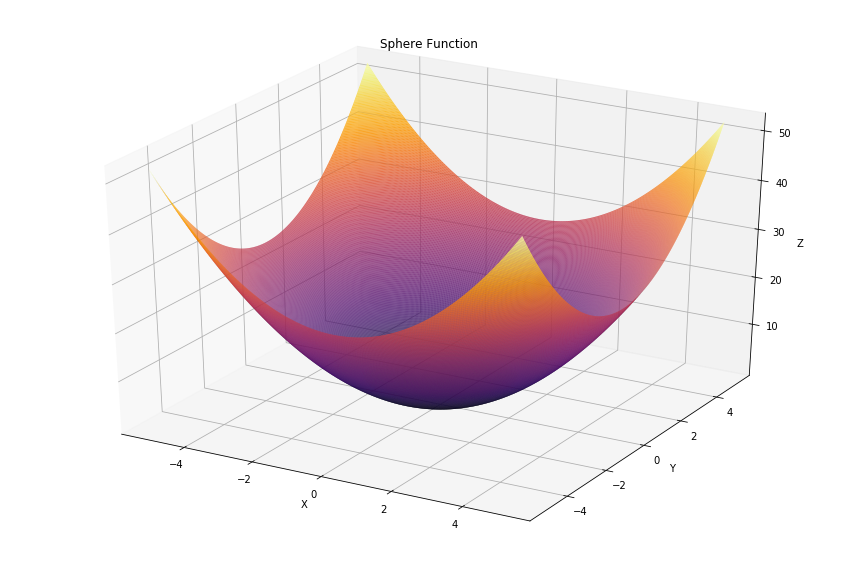

In [54]:
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='inferno')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Sphere Function')

plt.show()

### Ackley Function

Very challanging for optimization algorithms due to the amount of local minima.

$$f(x) = 20+e-20exp \left( -0.2 \sqrt{\sum^{n}_{i=1} \frac{1}{n} x^{2}_{i}} \right) -exp \left( \sum^{n}_{i=1} \frac{1}{n}(\cos2 \pi x_{i}) \right)$$
$$f(x^*) = 0$$

In [68]:
def ackley(x):
    sum_1 = np.sqrt(np.sum(np.power(x, 2) /x.shape[0], axis=0))
    term_1 = -20*np.power(np.e, (-0.2*sum_1))
    
    sum_2 = np.sum(np.cos(2*np.pi*x) /x.shape[0], axis=0)
    term_2 = -np.power(np.e, sum_2)
    
    return 20 + np.e + term_1 + term_2

In [73]:
x = np.linspace(-5, 5, 500)
y = np.linspace(-5, 5, 500)

X, Y = np.meshgrid(x, y)
Z = ackley(np.array([X, Y]))

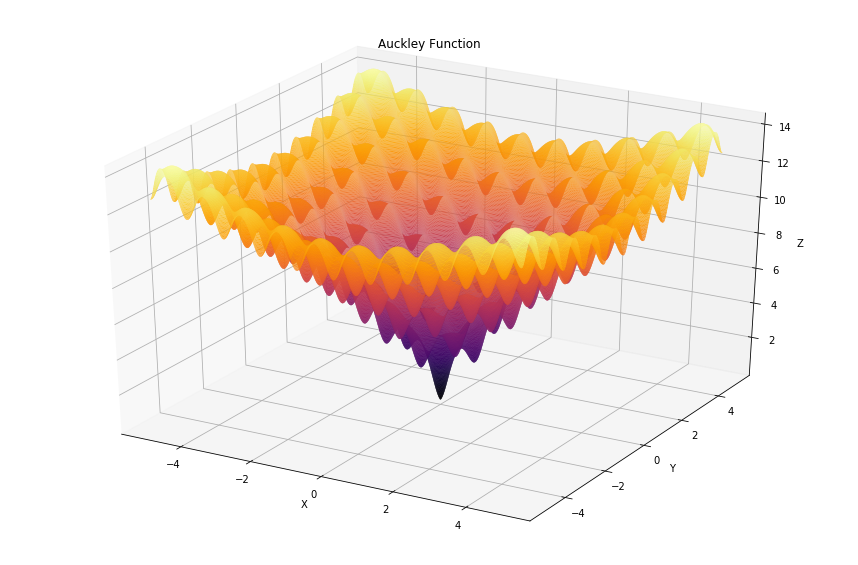

In [66]:
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='inferno')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Auckley Function')

plt.show()

### Auckley Test Function

Very difficult due to its massive amount of hills and valleys. In fact, $X^*$ and $f(x^*)$ are not known for this problem.

$$f(x) = \sum^{n-1}_{i=1} 3(\cos(2x_{i})+\sin(2x_{i+1})) + exp(-0.2) \sqrt{x^{2}_{i}+x^{2}_{i+1}}$$

In [165]:
def auckley_test(x):
    result = 0
    for i in range(0, x.shape[0]-1):
        term_1 = 3*(np.cos(2*x[i]) + np.sin(2*x[i+1]))
        term_2 = np.power(np.e, -0.2*np.sqrt(np.power(x[i], 2), np.power(x[i+1], 2)))
        result = result + term_1 + term_2
    
    return result

In [166]:
x = np.linspace(-5, 5, 500)
y = np.linspace(-5, 5, 500)

X, Y = np.meshgrid(x, y)
Z = auckley_test(np.array([X, Y]))

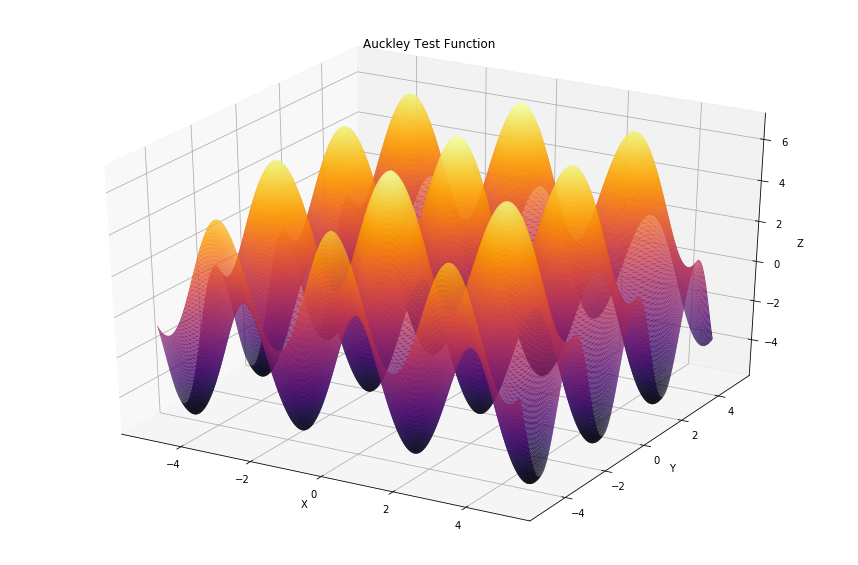

In [167]:
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='inferno')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Auckley Test Function')

plt.show()

### The Rosenbrock Function

Rosenbrock function has a long, narrow, banana-shaped valley that makes it a challange fr optimization algorithms.

$$f(x)=\sum^{n-1}_{i=1} [100(x_{i+1}-x^{2}_{i})^2 + (x_{i} - 1)^2]$$
$$f(x^*)=0$$

In [82]:
def rosenbrock_function(x):
    result = 0
    for i in range(x.shape[0]-1):
        term_1 = 100*np.power(x[i+1]-np.power(x[i], 2), 2)
        term_2 = np.power(x[i]-1, 2)
        result = result + term_1 + term_2
        
    return result

In [83]:
x = np.linspace(-2.048, 2.048, 500)
y = np.linspace(-2.048, 2.048, 500)

X, Y = np.meshgrid(x, y)
Z = rosenbrock_function(np.array([X, Y]))

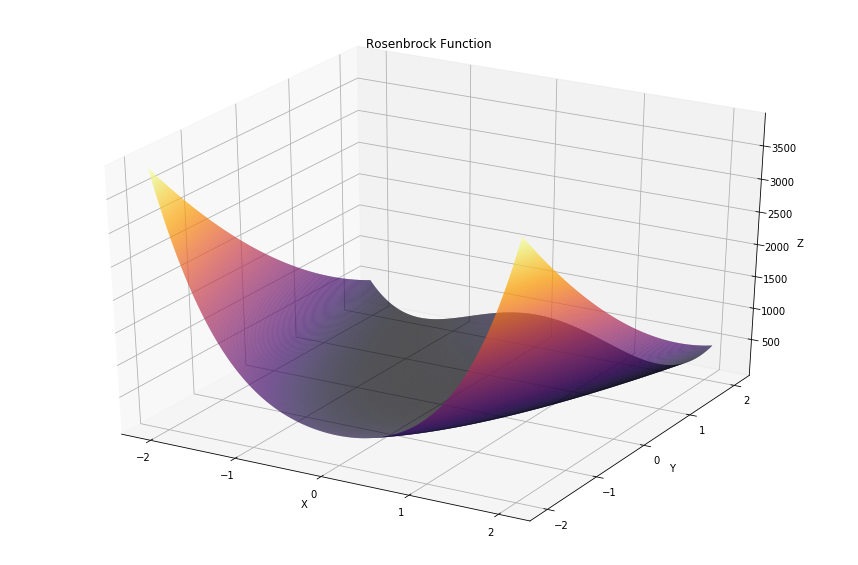

In [84]:
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='inferno')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Rosenbrock Function')

plt.show()

### Fletcher-Powell Function

Fletcher-Powell function is interesting because it changes with each realization of $a_{ij}$, $b_{ij}$ and $\alpha_{ij}$, which are often set with a uniform random number generator.

$$
f(x) \quad = \quad \sum^{n}_{i=1}(A_{i}-B_{i})^2 \\
A_{i} \quad = \quad \sum^{n}_{i=1}(a_{ij}\sin \alpha_{j}+b_{ij}\cos \alpha_{j}) \\
B_{i} \quad = \quad \sum^{n}_{i=1}(a_{ij}\sin x_{j} + b_{ij} \cos x_{j}) \\
\alpha_{i} \quad \in \quad [-\pi, \pi], \quad i \in \{1, \cdots, n\} \\
a_{ij}, b_{ij} \quad \in \quad [-100, 100], \quad i, j \in \{1, \cdots, n\} \\
f(x^*) \quad = \quad 0
$$

In [2]:
# TODO: write vectorized function
def fletcher_powell(x):
    a = np.random.uniform(-100, 100, (x.shape[0], x.shape[0]))
    b = np.random.uniform(-100, 100, (x.shape[0], x.shape[0]))
    alpha = np.linspace(-np.pi, np.pi, x.shape[0])
    
    result = 0
    for i in range(x.shape[0]):
        A = 0
        B = 0
        for j in range(x.shape[0]):
            A += a[i][j]*np.sin(alpha[j]) + b[i][j]*np.cos(alpha[j])
            B += a[i][j]*np.sin(x[j]) + b[i][j]*np.cos(x[j])
        result += np.power(A-B, 2)

    return result

In [5]:
x = np.linspace(-np.pi, np.pi, 500)
y = np.linspace(-np.pi, np.pi, 500)

X, Y = np.meshgrid(x, y)
Z = fletcher_powell(np.array([X, Y]))

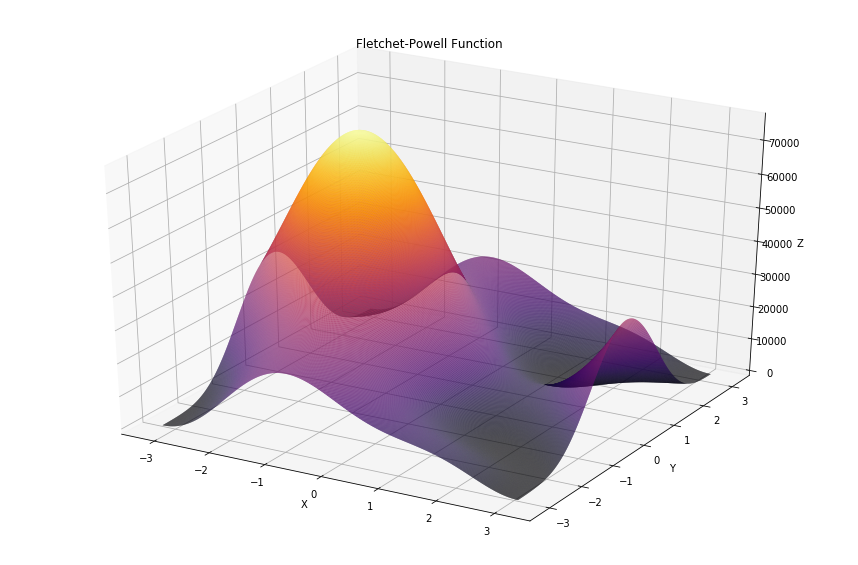

In [7]:
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='inferno')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Fletchet-Powell Function')

plt.show()

### The Grienwank Function

Grienwank function has many local optima, and the product term in f(x) causes a lot of interdependence among the components of x.

$$f(x)=1+\sum^{n}_{i=1} \frac{1}{4000}x^{2}_{i} - \prod^{n}_{i=1} \cos \left(\frac{x_{i}}{\sqrt{i}} \right)$$
$$x^{*} = 0$$
$$f(x^{*})=0$$

In [22]:
def grienwank_function(x):
    term_1 = np.sum(np.power(x, 2)*(1/4000))
    term_2 = 1
    for i in range(x.shape[0]):
        term_2 *= np.cos(x[i]*(1/np.sqrt(i+1)))
        
    return 1 + term_1 - term_2

In [31]:
x = np.linspace(-10, 10, 500)
y = np.linspace(-10, 10, 500)

X, Y = np.meshgrid(x, y)
Z = grienwank_function(np.array([X, Y]))

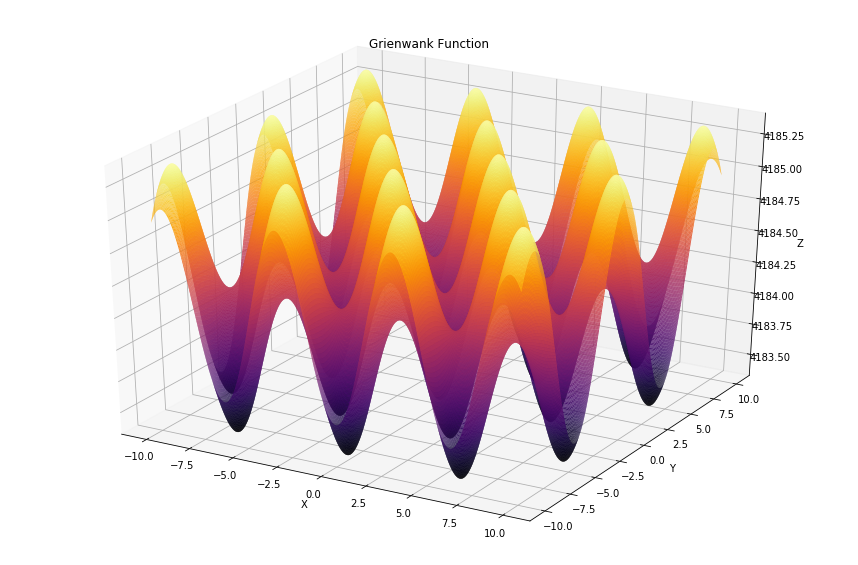

In [32]:
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='inferno')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Grienwank Function')

plt.show()

### The Penalty #1 Function

The Penalty #1 Function has one minimum, but the function is very shallow at the minimum, so its is a challenge to find it with high accuracy. The values for *k, a* and *m* are not given, but usually $k=100$, $a=10$ and $m=4$ are used.

$$f(x)=\frac{\pi}{n} \bigg\{ 10\sin^{2}(\pi y_{1}) + \sum^{n-1}_{i=1}(y_{i}-1)^{2} \big[1+10\sin^{2}(\pi y_{i+1})\big] + (y_{n}-1)^{2} \bigg\} + \sum^{n}_{i=1}u_{i}$$
$$
\begin{equation} \\
  u_{i}=\begin{cases}
     k(x_{i}-a)^{m} & x_{i} > a.\\
     \quad \quad 0 & -a \leq x_{i} \leq a.\\
     k(-x_{i}-a)^{m} & x_{i} < -a. \\
  \end{cases} \\
\end{equation}
$$
$$y_{i}=1+(x_{i}+1)/4$$
$$k=100, \quad a=10, \quad m=4$$
$$x^{*} = [1, \ldots, 1]$$
$$f(x^{*})=0$$

In [196]:
def penalty_1_function(x, k=100, a=10, m=4):
    n = x.shape[0]
    
    y = 1 + 0.25*(x + 1)
    
    term_1 = 0
    for i in range(n-1):
        term_1 += np.power((y[i]-1), 2) * (1 + 10*np.power(np.sin(np.pi*y[i+1]), 2)) + np.power((y[n-1]-1), 2)
    term_1 = 10*np.power(np.sin(np.pi*y[0]), 2) + term_1
    
    u = x.copy()
    u[u>a] = k*np.power((u[u>a]-a), m)
    u[(u>=-a) & (u<=a)] = 0
    u[u<-a] = k*np.power((-u[u<-a]-a), m)
            
    return (np.pi/n) * term_1 + np.sum(u)

In [203]:
x = np.linspace(-5, 5, 500)
y = np.linspace(-5, 5, 500)

X, Y = np.meshgrid(x, y)
Z = penalty_1_function(np.array([X, Y]))

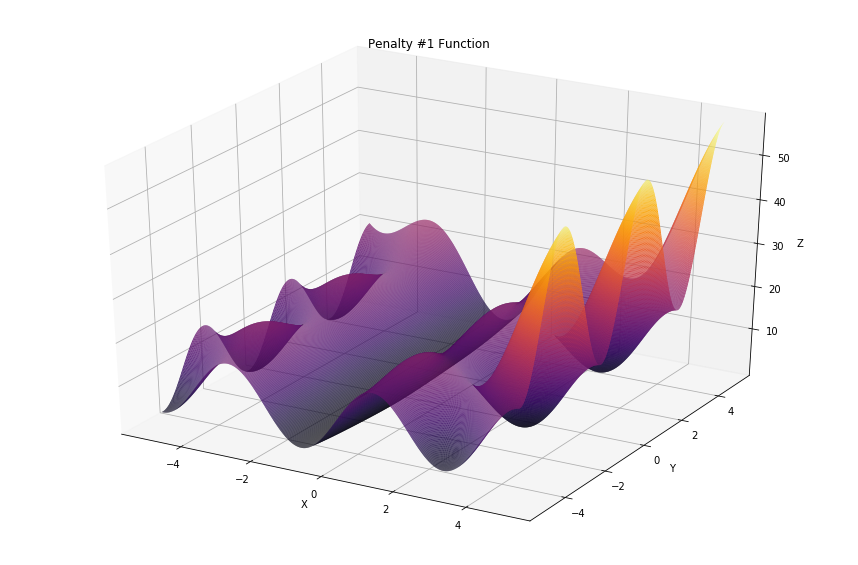

In [204]:
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='inferno')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Penalty #1 Function')

plt.show()

### The Penalty #2 Function

Like Penalty #1, Penalty #2 Function only has one minimum, but the function is very shallow there, thus making it a challenge to find the minimum with high accuracy. Likewise in Penalty #1, parameters *k, a* and *m* are not given, but usually are set to $k=100$, $a=5$, $m=4$.

$$f(x)=0.1\bigg\{\sin^{2}(3\pi x_{1}) + \sum^{n-1}_{i=1}(x_{i}-1)^{2}\big[1+\sin^{2}(3\pi x_{i+1})\big]+(x_{n}-1)^2 \big[1+\sin^{2}(2\pi x_{n}) \big] \bigg\} + \sum^{n}_{i=1}u_{i} $$
$$
\begin{equation} \\
  u_{i}=\begin{cases}
     k(x_{i}-a)^{m} & x_{i} > a.\\
     \quad \quad 0 & -a \leq x_{i} \leq a.\\
     k(-x_{i}-a)^{m} & x_{i} < -a. \\
  \end{cases} \\
\end{equation}
$$
$$k=100, \quad a=5, \quad m=4$$
$$x^{*} = [1, \ldots, 1]$$
$$f(x^{*})=0$$

In [2]:
def penalty_2_function(x, k=100, a=5, m=4):
    n = x.shape[0]
    
    term_1 = 0
    for i in range(n-1):
        part_1 = np.power((x[i]-1), 2) * (1+np.power(np.sin(3*np.pi*x[i+1]), 2))
        part_2 = np.power((x[n-1]-1), 2) * (1+np.power(np.sin(2*np.pi*x[n-1]), 2))
        term_1 += part_1 + part_2 
    term_1 = np.power(np.sin(3*np.pi*x[0]), 2) + term_1
        
    u = x.copy()
    u[u>a] = k*np.power((u[u>a]-a), m)
    u[(u>=-a) & (u<=a)] = 0
    u[u<-a] = k*np.power((-u[u<-a]-a), m)
    
    return 0.1*term_1 + np.sum(u)

In [7]:
x = np.linspace(-50, 50, 500)
y = np.linspace(-50, 50, 500)

X, Y = np.meshgrid(x, y)
Z = penalty_2_function(np.array([X, Y]))

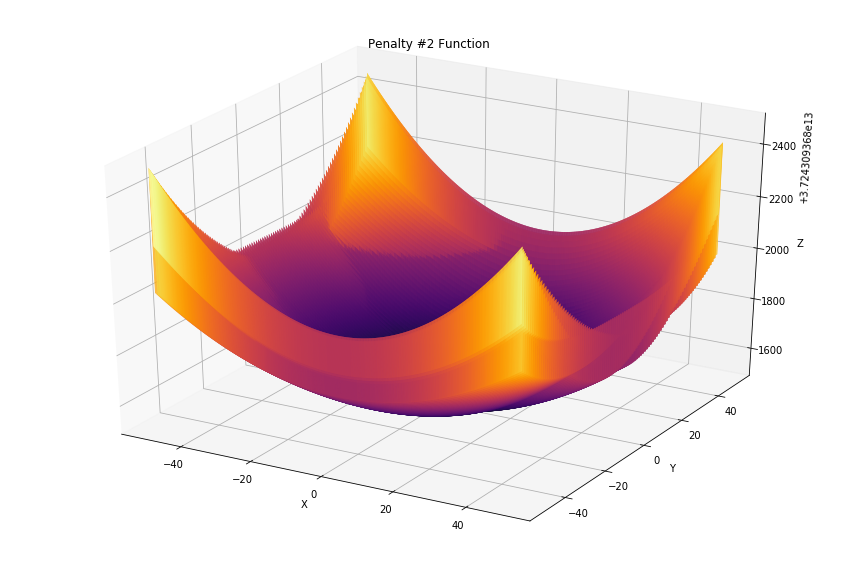

In [8]:
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='inferno')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Penalty #2 Function')

plt.show()

### The Quartic Function

Like the penalty function, it has only one, very shallow minimum, so it's a challenge for the algorithm to find it with high accuracy. Sometime noise is added to f(x), although that doesn't change the argument of the minimum. If we raise the $x_{i}$ of the quartic function to the second power, instead of fourth, we get an **hyper-ellipsoid function**, also known as the **weighted sphere function**

$$f(x)=\sum^{n}_{i=1} ix^{4}_{i}$$
$$x^{*}=0$$
$$f(x^{*})=0$$

In [16]:
def quartic_function(x, power=4):
    result = 0
    for i in range(x.shape[0]):
        result += (i+1)*np.power(x[i], power)
        
    return result

In [17]:
x = np.linspace(-1.28, 1.28, 500)
y = np.linspace(-1.28, 1.28, 500)

X, Y = np.meshgrid(x, y)
Z = quartic_function(np.array([X, Y]))

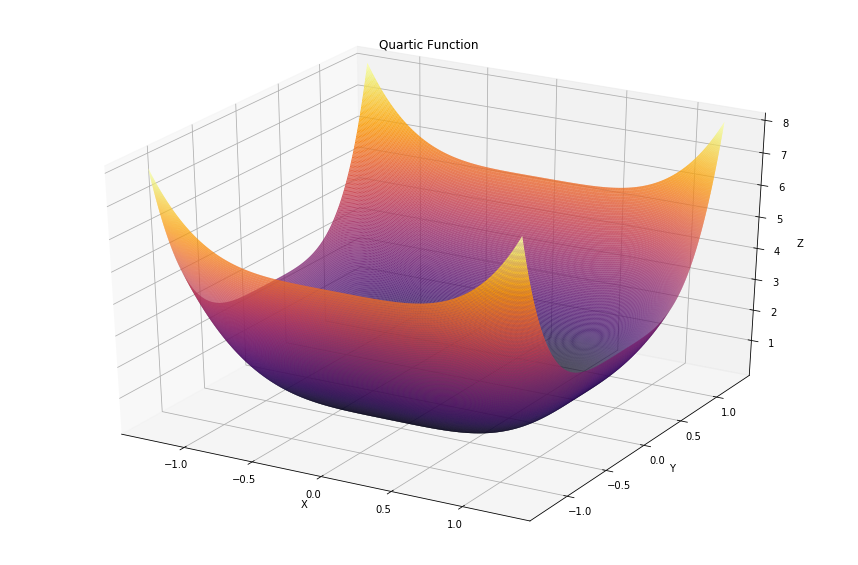

In [18]:
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='inferno')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Quartic Function')

plt.show()

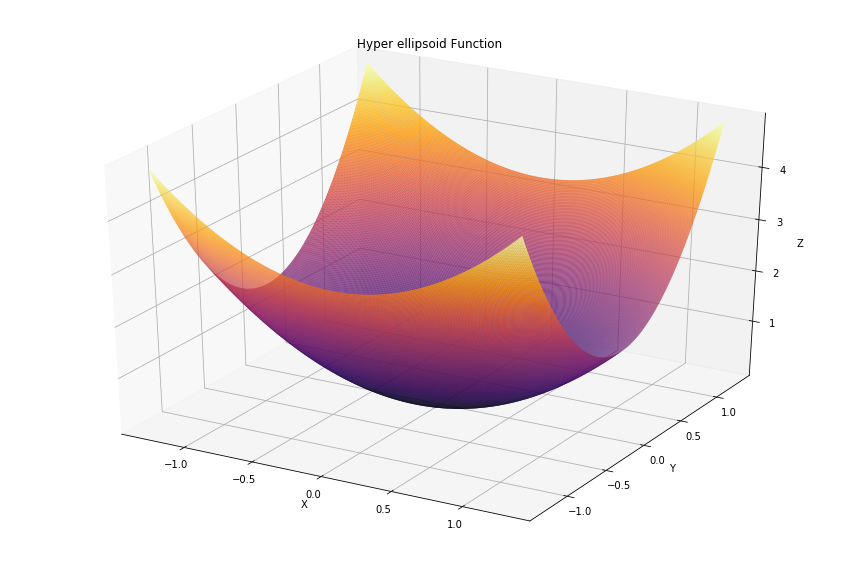

In [19]:
# + hyper-ellipsoid function
Z = quartic_function(np.array([X, Y]), power=2)

fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='inferno')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Hyper ellipsoid Function')

plt.show()

### The Tenth Power Function

Similarly to quartic and penalty functions, the Tenth Power Function also has one very shallow minimum, which proves to be a challenge to find it with high accuracy.

$$f(x)=\sum^{n}_{i=1}x^{10}_{i}$$
$$x^{*}=0$$
$$f(x^{*})=0$$

In [24]:
def tenth_power_function(x):
    return np.sum(np.power(x, 10), axis=0)

In [25]:
x = np.linspace(-5.12, 5.12, 500)
y = np.linspace(-5.12, 5.12, 500)

X, Y = np.meshgrid(x, y)
Z = tenth_power_function(np.array([X, Y]))

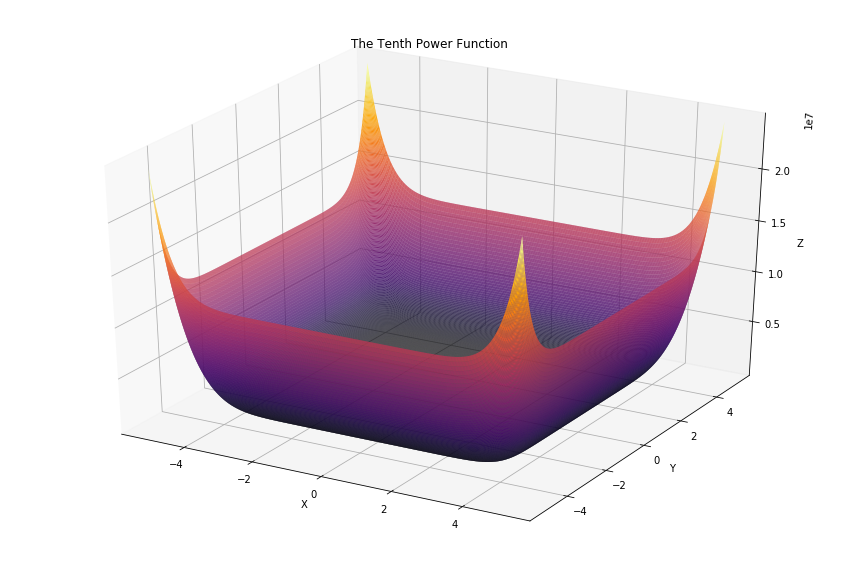

In [26]:
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='inferno')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('The Tenth Power Function')

plt.show()

### The Rastrigin Function

The Rastrigin Function looks similar to the Grienwank function. The number of local minima in the Rastrigin function increases exponentially with n.

$$f(x)=10n+ \sum^{n}_{i=1}x^{2}_{i} - 10 \cos(2\pi x_{i})$$
$$x^{*} = 0$$
$$f(x^{*}) = 0$$

In [35]:
def rastrigin_function(x):
    return 10*x.shape[0] + np.sum(np.power(x, 2) - 10*np.cos(2*np.pi*x), axis=0)

In [36]:
x = np.linspace(-5.12, 5.12, 500)
y = np.linspace(-5.12, 5.12, 500)

X, Y = np.meshgrid(x, y)
Z = rastrigin_function(np.array([X, Y]))

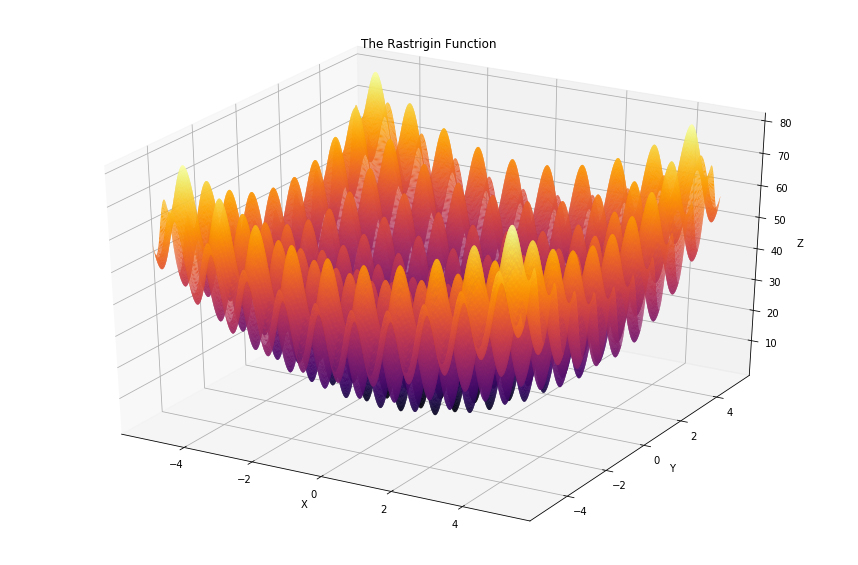

In [38]:
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='inferno')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('The Rastrigin Function')

plt.show()

### The Schwefel Double Sum Function

The Schwefel Double Sum Function is also called **Schwefel's ridge function**, **Scwefel 1.2** and the **Quadratic Function**. As last name suggests, it is a quadratic function whose condition number is proportional to $n^{2}$.

$$f(x)=\sum^{n}_{i=1}\big(\sum^{i}_{j=1}x_{j}\big)^{2}$$
$$x^{*} = 0$$
$$f(x^{*})=0$$

In [41]:
def schwefel_double_function(x):
    result = 0
    for i in range(x.shape[0]):
        sum_2 = 0
        for j in range(i+1):
            sum_2 += x[j]
        result += np.power(sum_2, 2)
    return result

In [42]:
x = np.linspace(-65.536, 65.536, 500)
y = np.linspace(-65.536, 65.536, 500)

X, Y = np.meshgrid(x, y)
Z = schwefel_double_function(np.array([X, Y]))

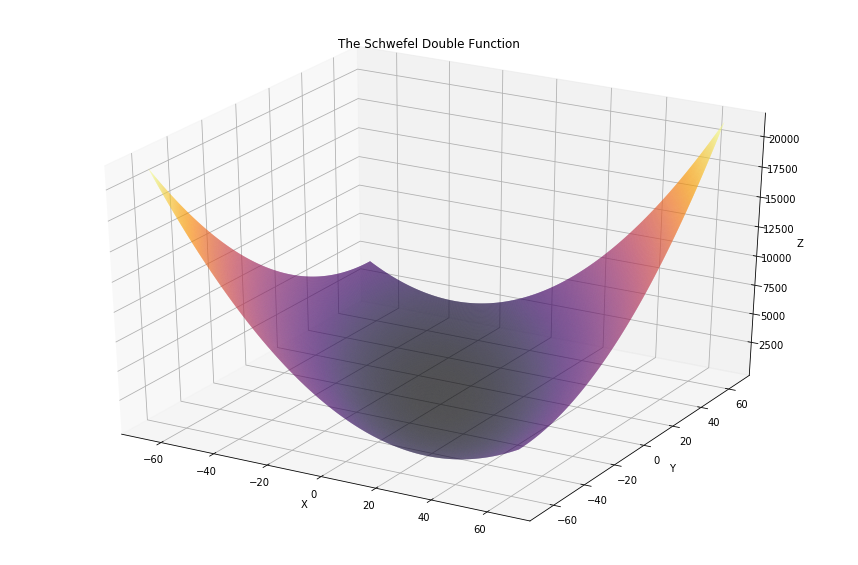

In [44]:
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='inferno')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('The Schwefel Double Function')

plt.show()

### The Schwefel Max Function

Shwefel Max Function, also known as **Schwefel 2.21 function** in nondifferentiable.

$$f(x) = \max_{i}(|x_{i}|:i\in \{1, \dots, n\})$$
$$x^{*} = 0$$
$$f(x^{*}) = 0$$

In [49]:
def schwefel_max_function(x):
    return (np.maximum.reduce(abs(x)))

In [50]:
x = np.linspace(-100, 100, 500)
y = np.linspace(-100, 100, 500)

X, Y = np.meshgrid(x, y)
Z = schwefel_max_function(np.array([X, Y]))

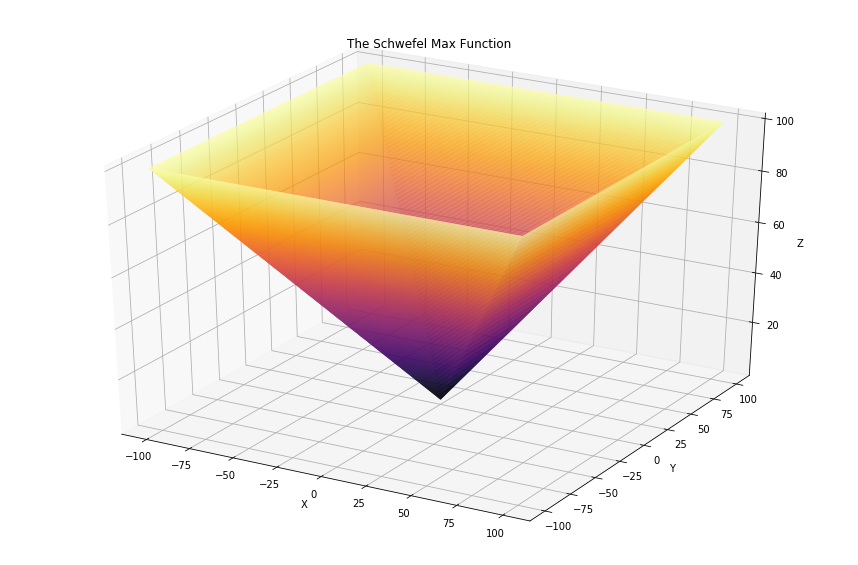

In [52]:
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='inferno')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('The Schwefel Max Function')

plt.show()

### The Schwefel Absolute Function

Also known as **Schwefel 2.22 function** is a nondifferentiable function.

$$f(x)=\sum_{i=1}^{n}  |x_{i}| + \prod^{n}_{i=1} |x_{i}|$$
$$x^{*}=0$$
$$f(x^{*})=0$$

In [85]:
def schwefel_absolute_function(x):        
    term_1 = 0
    term_2 = 1
    for i in range(x.shape[0]):
        term_1 += abs(x[i])
        term_2 *= abs(x[i])
    return term_1 + term_2

In [86]:
x = np.linspace(-10, 10, 500)
y = np.linspace(-10, 10, 500)

X, Y = np.meshgrid(x, y)
Z = schwefel_absolute_function(np.array([X, Y]))

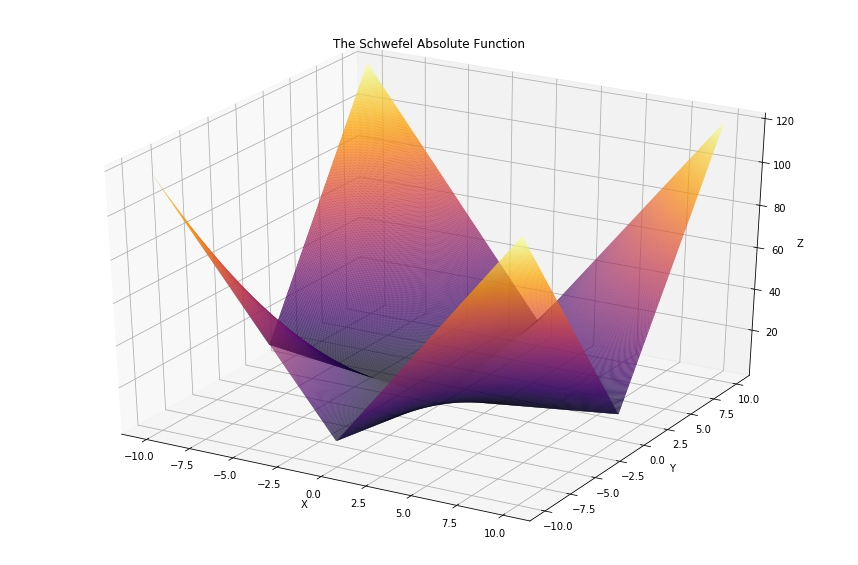

In [87]:
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='inferno')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('The Schwefel Absolute Function')

plt.show()

### The Schwefel Sine Function

Also called **Schwefel 2.26 function** has many local minima.

$$f(x) = -\sum^{n}_{i=1}x_{i} \sin \sqrt{(|x_{i}|)}$$
$$x^{*}=[420.9687, \dots, 420.9867]$$
$$f(x^{*})=-12965.5$$

In [96]:
def schwefel_sine_function(x):
    result = 0
    for i in range(x.shape[0]):
        result += x[i]*np.sin(np.sqrt(abs(x[i])))
        
    return -result

In [97]:
x = np.linspace(-500, 500, 500)
y = np.linspace(-500, 500, 500)

X, Y = np.meshgrid(x, y)
Z = schwefel_sine_function(np.array([X, Y]))

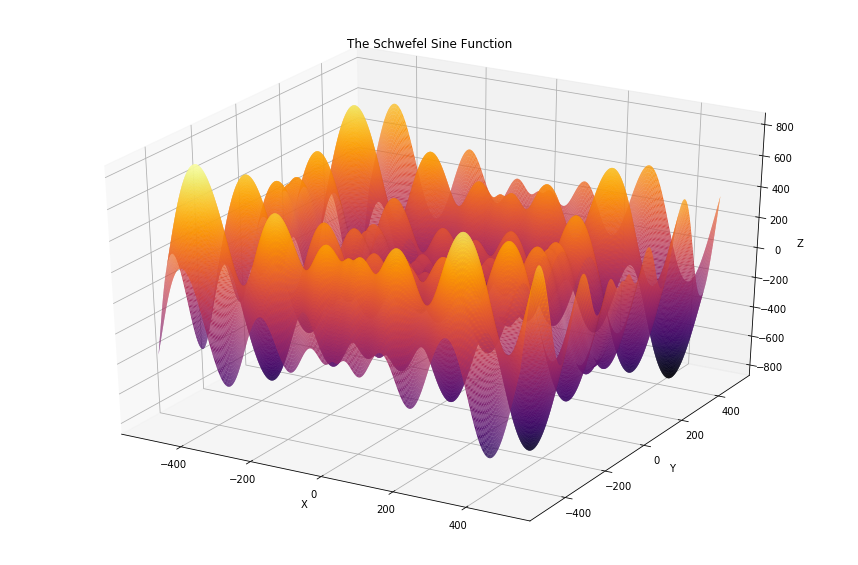

In [99]:
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='inferno')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('The Schwefel Sine Function')

plt.show()

### The Step Function

The Step Function is not differentiable and has many plateaus.

$$f(x)=\sum^{n}_{i=1}( \text{floor} (x_{i}+0.5))^{2}$$
$$x^{*} = 0$$
$$f(x^{*})=0$$

In [118]:
def step_function(x):
    result = 0
    for i in range(x.shape[0]):
        result += np.power(np.floor(x[i] + 0.5), 2)
        
    return result

In [121]:
x = np.linspace(-10, 10, 500)
y = np.linspace(-10, 10, 500)

X, Y = np.meshgrid(x, y)
Z = step_function(np.array([X, Y]))

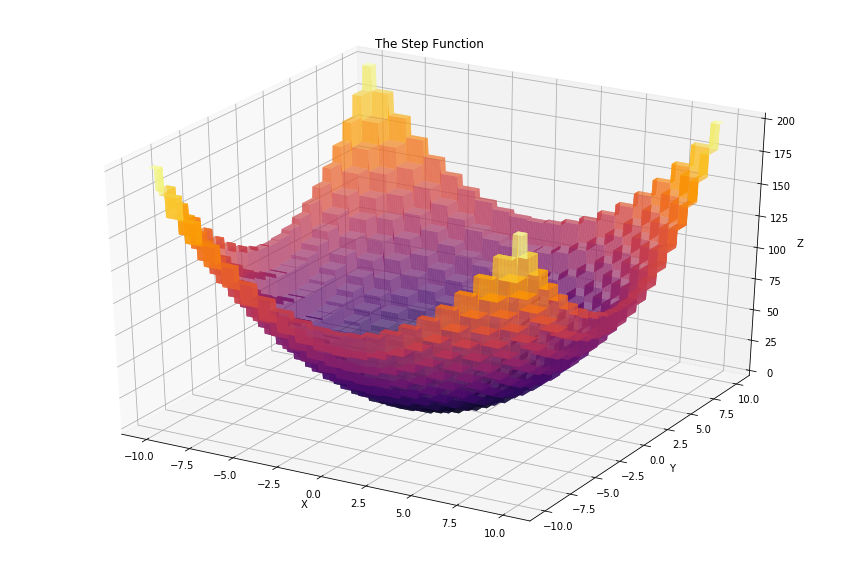

In [122]:
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='inferno')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('The Step Function')

plt.show()

### The Absolute Function

The Absolute Function is not differentiable.

$$f(x)= \sum^{n}_{i=1}|x_{i}|$$
$$x^{*}=0$$
$$f(x^{*})=0$$

In [127]:
def absolute_function(x):
    result = 0
    for i in range(x.shape[0]):
        result += abs(x[i])
        
    return result

In [128]:
x = np.linspace(-10, 10, 500)
y = np.linspace(-10, 10, 500)

X, Y = np.meshgrid(x, y)
Z = absolute_function(np.array([X, Y]))

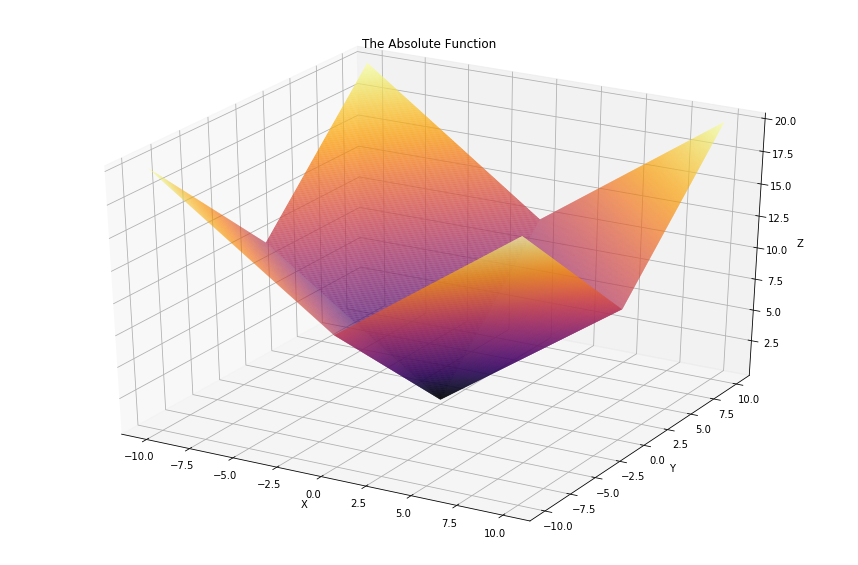

In [130]:
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='inferno')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('The Absolute Function')

plt.show()

### The Shekel's Foxhole Function

Shekel's Foxhole Function has multiple local minima, where not all of which are the same value. It also has a steep drop to its minimum.

$$f(x)= \bigg[ \frac{1}{500}+\sum^{n}_{j=1}5 \frac{1}{j+\sum^{2}_{i=1}(x_{i}-a_{ij})^6} \bigg]^{-1}$$
$$x^{*}=[-32, \dots, -32]$$
$$f(x^{*})= 1$$

where, for 2 dimensions (n=2), a is given by:

$$a=
\begin{bmatrix}
    b_{0} \dots b_{0} \\
    b_{1} \dots b_{5} \\
\end{bmatrix}
$$
$$b_{0}=[\quad -32 \quad -16 \quad 0 \quad 16 \quad 32 \quad]$$
$$b_{i}=(16(i-1)-32)[\quad 1 \quad 1 \quad 1 \quad 1 \quad 1 \quad]$$
    

In [199]:
def shekel_foxhole_function(x, num_holes=5):
    a = np.tile(np.array([-32, -16, 0, 16, 32]), num_holes)
    b = np.array([])
    for i in range(num_holes):
        b = np.hstack((b, np.repeat((16 * i - 32), num_holes)))
    a = np.vstack((a, b))
        
    result = 0
    for j in range(num_holes*num_holes):
        term_1 = 0
        for i in range(x.shape[0]):
            term_1 += np.power((x[i]-a[i][j]), 6)
        result += 1/(j+term_1)
        
    return np.power((0.002+result), -1)

In [200]:
x = np.linspace(-65.536, 65.536, 500)
y = np.linspace(-65.536, 65.536, 500)

X, Y = np.meshgrid(x, y)
Z = shekel_foxhole_function(np.array([X, Y]))

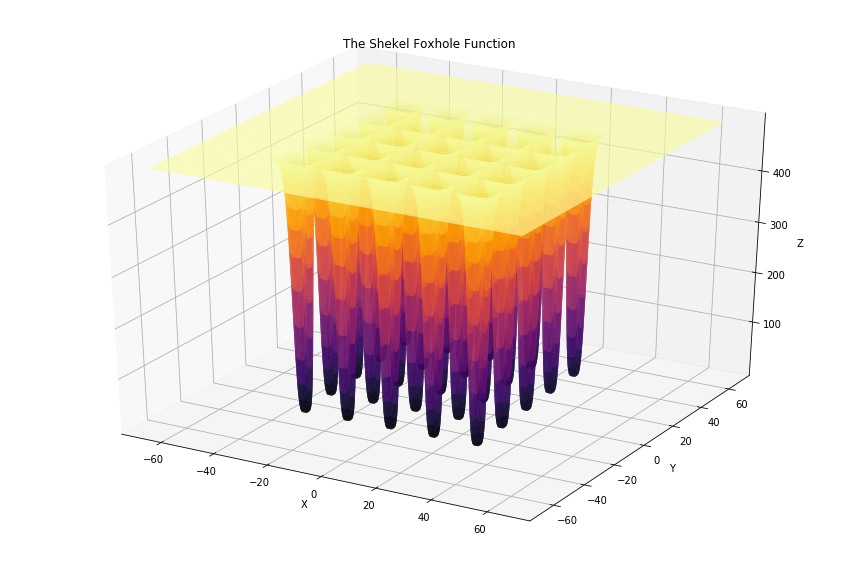

In [201]:
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='inferno')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('The Shekel Foxhole Function')

plt.show()

### The Michalewicz Function

For Michalewicz Function, there is an *m* paremeter that controls the difficulty of the search. Both $X^{*}$ and $f(x^{*})$ are unknown for this problem. The function has long narrow valleys with a sudden drop-off to the minimum.

$$f(x)=-\sum^{n}_{i=1} \sin x_{i} \sin^{2m}(ix^{2}_{i}/\pi)$$

In [222]:
def michalewicz_function(x, m=2):
    result = 0
    for i in range(x.shape[0]):
        result += np.sin(x[i]) * np.power(np.sin( ((i+1)*np.power(x[i], 2)) / np.pi ), 2*m)
        
    return -result

In [223]:
x = np.linspace(0, np.pi, 500)
y = np.linspace(0, np.pi, 500)

X, Y = np.meshgrid(x, y)
Z = michalewicz_function(np.array([X, Y]))

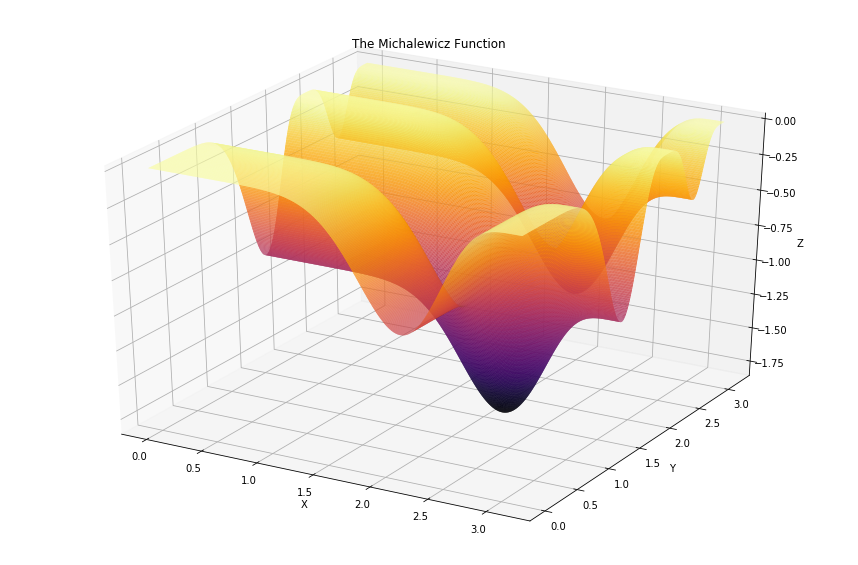

In [224]:
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='inferno')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('The Michalewicz Function')

plt.show()

### The Sine Envelope Function

The Sine Envelope function is also called **Schaeffer function #6** and has many valleys and local minima. The $x^{*}$ and $f(x^{*})$ are both unknown for this problem.

$$f(x)=0.5+\sum^{n-1}_{i=1} \frac {\sin^{2}\sqrt{x^{2}_{i}+x^{2}_{i+1}}-0.5}{\big[1 + 0.001(x^{2}_{i}+x^{2}_{i+1})\big]^{2}}$$

In [263]:
def sine_envolope(x):
    result = 0
    for i in range(x.shape[0]-1):
        term_1 = np.sin(np.sqrt(x[i]**2 + x[i+1]**2))-0.5 
        term_2 = np.power(1 + 0.001*(x[i]**2 + x[i+1]**2), 2)
        result += (term_1 / term_2)
        
    return 0.5 + result

In [268]:
x = np.linspace(-15, 15, 500)
y = np.linspace(-15, 15, 500)

X, Y = np.meshgrid(x, y)
Z = sine_envolope(np.array([X, Y]))

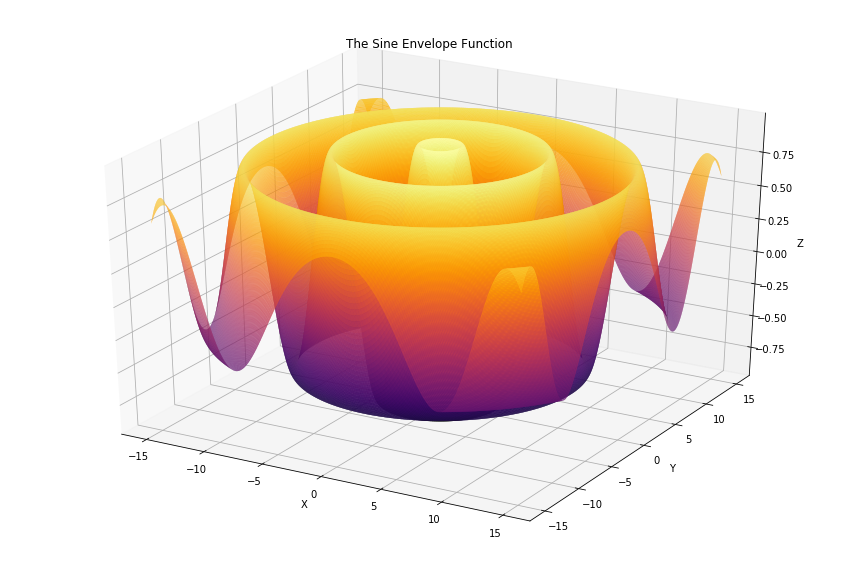

In [269]:
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='inferno')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('The Sine Envelope Function')

plt.show()

### The Eggholder Function

As with the last couple functions, both $x^{*}$ and $f(x^{*})$ are not known for this problem.

$$f(x) = -\sum^{n-1}_{i=1}(x_{i+1}+47) \sin \sqrt{|x_{i+1} + x_{i}/2 + 47|} + x_{i} \sin \sqrt{|x_{i}-x_{i+1} - 47|}$$

In [273]:
def eggholder_function(x):
    result = 0
    for i in range(x.shape[0]-1):
        term_1 = (x[i+1]+47) * np.sin( np.sqrt(abs(x[i+1] + x[i]/2 + 47)) )
        term_2 = x[i] * np.sin(np.sqrt(abs(x[i] - x[i+1] - 47)))
        result += term_1 + term_2
        
    return result

In [274]:
x = np.linspace(-512, 512, 500)
y = np.linspace(-512, 512, 500)

X, Y = np.meshgrid(x, y)
Z = eggholder_function(np.array([X, Y]))

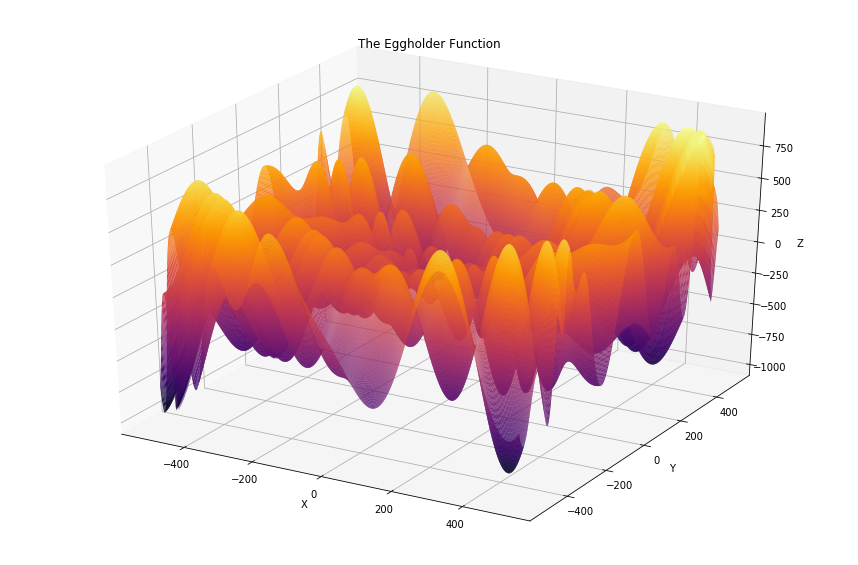

In [275]:
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='inferno')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('The Eggholder Function')

plt.show()